Data preprocessing 


In [5]:
# Import libraries for pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import libraries for model selection

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
# Create the dataframe

df = pd.read_csv('../Preprocessing/dataset_renamed_columns_dropped.csv')
df.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,...,Avg>2.5 = Market average over 2.5 goals,AHh = Market size of handicap (home team) (since 2019/2020),B365AHH = Bet365 Asian handicap home team odds,B365AHA = Bet365 Asian handicap away team odds,PAHH = Pinnacle Asian handicap home team odds,PAHA = Pinnacle Asian handicap away team odds,MaxAHH = Market maximum Asian handicap home team odds,MaxAHA = Market maximum Asian handicap away team odds\t,AvgAHH = Market average Asian handicap home team odds,AvgAHA = Market average Asian handicap away team odds
0,B1,2024-09-01,18:15:00,Kortrijk,St Truiden,1.0,1.0,D,0.0,1.0,...,1.94,-0.25,1.83,2.03,1.83,2.01,1.87,2.06,1.82,2.00
1,B1,2024-09-01,17:30:00,St. Gilloise,Anderlecht,0.0,0.0,D,0.0,0.0,...,2.07,-0.50,2.05,1.75,2.07,1.78,2.10,1.85,2.05,1.78
2,B1,2024-09-01,15:00:00,Gent,Antwerp,1.0,1.0,D,1.0,1.0,...,2.13,0.00,1.88,1.98,1.85,1.98,1.92,2.02,1.87,1.97
3,B1,2024-09-01,12:30:00,Club Brugge,Cercle Brugge,3.0,0.0,H,2.0,0.0,...,2.50,-1.00,1.85,2.00,1.85,1.99,1.90,2.04,1.84,1.97
4,B1,2024-08-31,19:45:00,Oud-Heverlee Leuven,Standard,2.0,0.0,H,1.0,0.0,...,1.84,-0.50,1.95,1.90,1.95,1.90,1.98,1.97,1.93,1.88


In [7]:
# Drop the columns that are not needed

df = df.drop(['Div'], axis=1)
df.head()


,Date,Time,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,"HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)",...,Avg>2.5 = Market average over 2.5 goals,AHh = Market size of handicap (home team) (since 2019/2020),B365AHH = Bet365 Asian handicap home team odds,B365AHA = Bet365 Asian handicap away team odds,PAHH = Pinnacle Asian handicap home team odds,PAHA = Pinnacle Asian handicap away team odds,MaxAHH = Market maximum Asian handicap home team odds,MaxAHA = Market maximum Asian handicap away team odds\t,AvgAHH = Market average Asian handicap home team odds,AvgAHA = Market average Asian handicap away team odds
0,2024-09-01,18:15:00,Kortrijk,St Truiden,1.0,1.0,D,0.0,1.0,A,...,1.94,-0.25,1.83,2.03,1.83,2.01,1.87,2.06,1.82,2.00
1,2024-09-01,17:30:00,St. Gilloise,Anderlecht,0.0,0.0,D,0.0,0.0,D,...,2.07,-0.50,2.05,1.75,2.07,1.78,2.10,1.85,2.05,1.78
2,2024-09-01,15:00:00,Gent,Antwerp,1.0,1.0,D,1.0,1.0,D,...,2.13,0.00,1.88,1.98,1.85,1.98,1.92,2.02,1.87,1.97
3,2024-09-01,12:30:00,Club Brugge,Cercle Brugge,3.0,0.0,H,2.0,0.0,H,...,2.50,-1.00,1.85,2.00,1.85,1.99,1.90,2.04,1.84,1.97
4,2024-08-31,19:45:00,Oud-Heverlee Leuven,Standard,2.0,0.0,H,1.0,0.0,H,...,1.84,-0.50,1.95,1.90,1.95,1.90,1.98,1.97,1.93,1.88


In [8]:
# Fill missing values
def clean_data(df):

    # Replace missing values with the median of each column in: 'HTHG = Half Time Home Team Goals'
    df = df.fillna({'HTHG = Half Time Home Team Goals': df['HTHG = Half Time Home Team Goals'].median()})
    # Replace missing values with the median of each column in: 'HTAG = Half Time Away Team Goals'
    df = df.fillna({'HTAG = Half Time Away Team Goals': df['HTAG = Half Time Away Team Goals'].median()})
    # Replace missing values with the most common value of each column in: 'HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'
    df = df.fillna({'HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)': df['HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'].mode()[0]})
    # Replace missing values with the median of each column in: 'HS = Home Team Shots'
    df = df.fillna({'HS = Home Team Shots': df['HS = Home Team Shots'].median()})
    # Replace missing values with the median of each column in: 'AS = Away Team Shots'
    df = df.fillna({'AS = Away Team Shots': df['AS = Away Team Shots'].median()})
    # Replace missing values with the median of each column in: 'HST = Home Team Shots on Target'
    df = df.fillna({'HST = Home Team Shots on Target': df['HST = Home Team Shots on Target'].median()})
    # Replace missing values with the median of each column in: 'AST = Away Team Shots on Target'
    df = df.fillna({'AST = Away Team Shots on Target': df['AST = Away Team Shots on Target'].median()})
    # Replace missing values with the median of each column in: 'HF = Home Team Fouls Committed'
    df = df.fillna({'HF = Home Team Fouls Committed': df['HF = Home Team Fouls Committed'].median()})
    # Replace missing values with the median of each column in: 'AF = Away Team Fouls Committed', 'HTHG = Half Time Home Team Goals' and 47 other columns
    df = df.fillna({'AF = Away Team Fouls Committed': df['AF = Away Team Fouls Committed'].median(), 'HTHG = Half Time Home Team Goals': df['HTHG = Half Time Home Team Goals'].median(), 'HTAG = Half Time Away Team Goals': df['HTAG = Half Time Away Team Goals'].median(), 'HS = Home Team Shots': df['HS = Home Team Shots'].median(), 'AS = Away Team Shots': df['AS = Away Team Shots'].median(), 'HST = Home Team Shots on Target': df['HST = Home Team Shots on Target'].median(), 'AST = Away Team Shots on Target': df['AST = Away Team Shots on Target'].median(), 'HF = Home Team Fouls Committed': df['HF = Home Team Fouls Committed'].median(), 'HC = Home Team Corners': df['HC = Home Team Corners'].median(), 'AC = Away Team Corners': df['AC = Away Team Corners'].median(), 'HY = Home Team Yellow Cards': df['HY = Home Team Yellow Cards'].median(), 'AY = Away Team Yellow Cards': df['AY = Away Team Yellow Cards'].median(), 'HR = Home Team Red Cards': df['HR = Home Team Red Cards'].median(), 'AR = Away Team Red Cards': df['AR = Away Team Red Cards'].median(), 'B365H = Bet365 home win odds': df['B365H = Bet365 home win odds'].median(), 'B365D = Bet365 draw odds': df['B365D = Bet365 draw odds'].median(), 'B365A = Bet365 away win odds': df['B365A = Bet365 away win odds'].median(), 'BWH = Bet&Win home win odds': df['BWH = Bet&Win home win odds'].median(), 'BWD = Bet&Win draw odds': df['BWD = Bet&Win draw odds'].median(), 'BWA = Bet&Win away win odds': df['BWA = Bet&Win away win odds'].median(), 'PSH and PH = Pinnacle home win odds': df['PSH and PH = Pinnacle home win odds'].median(), 'PSD and PD = Pinnacle draw odds': df['PSD and PD = Pinnacle draw odds'].median(), 'PSA and PA = Pinnacle away win odds': df['PSA and PA = Pinnacle away win odds'].median(), 'WHH = William Hill home win odds': df['WHH = William Hill home win odds'].median(), 'WHD = William Hill draw odds': df['WHD = William Hill draw odds'].median(), 'WHA = William Hill away win odds': df['WHA = William Hill away win odds'].median(), 'MaxH = Market maximum home win odds': df['MaxH = Market maximum home win odds'].median(), 'MaxD = Market maximum draw win odds': df['MaxD = Market maximum draw win odds'].median(), 'MaxA = Market maximum away win odds': df['MaxA = Market maximum away win odds'].median(), 'AvgH = Market average home win odds': df['AvgH = Market average home win odds'].median(), 'AvgD = Market average draw win odds': df['AvgD = Market average draw win odds'].median(), 'AvgA = Market average away win odds': df['AvgA = Market average away win odds'].median(), 'B365>2.5 = Bet365 over 2.5 goals': df['B365>2.5 = Bet365 over 2.5 goals'].median(), 'B365<2.5 = Bet365 under 2.5 goals': df['B365<2.5 = Bet365 under 2.5 goals'].median(), 'P>2.5 = Pinnacle over 2.5 goals': df['P>2.5 = Pinnacle over 2.5 goals'].median(), 'P<2.5 = Pinnacle under 2.5 goals': df['P<2.5 = Pinnacle under 2.5 goals'].median(), 'Max>2.5 = Market maximum over 2.5 goals': df['Max>2.5 = Market maximum over 2.5 goals'].median(), 'Max<2.5': df['Max<2.5'].median(), 'Max<2.5 = Market maximum under 2.5 goals': df['Max<2.5 = Market maximum under 2.5 goals'].median(), 'Avg>2.5 = Market average over 2.5 goals': df['Avg>2.5 = Market average over 2.5 goals'].median(), 'AHh = Market size of handicap (home team) (since 2019/2020)': df['AHh = Market size of handicap (home team) (since 2019/2020)'].median(), 'B365AHH = Bet365 Asian handicap home team odds': df['B365AHH = Bet365 Asian handicap home team odds'].median(), 'B365AHA = Bet365 Asian handicap away team odds': df['B365AHA = Bet365 Asian handicap away team odds'].median(), 'PAHH = Pinnacle Asian handicap home team odds': df['PAHH = Pinnacle Asian handicap home team odds'].median(), 'PAHA = Pinnacle Asian handicap away team odds': df['PAHA = Pinnacle Asian handicap away team odds'].median(), 'MaxAHH = Market maximum Asian handicap home team odds': df['MaxAHH = Market maximum Asian handicap home team odds'].median(), 'MaxAHA = Market maximum Asian handicap away team odds\t': df['MaxAHA = Market maximum Asian handicap away team odds\t'].median(), 'AvgAHH = Market average Asian handicap home team odds': df['AvgAHH = Market average Asian handicap home team odds'].median(), 'AvgAHA = Market average Asian handicap away team odds': df['AvgAHA = Market average Asian handicap away team odds'].median()})
    return df

df_clean = clean_data(df.copy())
df_clean.head()




,Date,Time,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,"HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)",...,Avg>2.5 = Market average over 2.5 goals,AHh = Market size of handicap (home team) (since 2019/2020),B365AHH = Bet365 Asian handicap home team odds,B365AHA = Bet365 Asian handicap away team odds,PAHH = Pinnacle Asian handicap home team odds,PAHA = Pinnacle Asian handicap away team odds,MaxAHH = Market maximum Asian handicap home team odds,MaxAHA = Market maximum Asian handicap away team odds\t,AvgAHH = Market average Asian handicap home team odds,AvgAHA = Market average Asian handicap away team odds
0,2024-09-01,18:15:00,Kortrijk,St Truiden,1.0,1.0,D,0.0,1.0,A,...,1.94,-0.25,1.83,2.03,1.83,2.01,1.87,2.06,1.82,2.00
1,2024-09-01,17:30:00,St. Gilloise,Anderlecht,0.0,0.0,D,0.0,0.0,D,...,2.07,-0.50,2.05,1.75,2.07,1.78,2.10,1.85,2.05,1.78
2,2024-09-01,15:00:00,Gent,Antwerp,1.0,1.0,D,1.0,1.0,D,...,2.13,0.00,1.88,1.98,1.85,1.98,1.92,2.02,1.87,1.97
3,2024-09-01,12:30:00,Club Brugge,Cercle Brugge,3.0,0.0,H,2.0,0.0,H,...,2.50,-1.00,1.85,2.00,1.85,1.99,1.90,2.04,1.84,1.97
4,2024-08-31,19:45:00,Oud-Heverlee Leuven,Standard,2.0,0.0,H,1.0,0.0,H,...,1.84,-0.50,1.95,1.90,1.95,1.90,1.98,1.97,1.93,1.88


In [9]:
# General statistics

df_clean.describe()
df_clean.info()
df_clean.columns
df_clean.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 57 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Date                                                             1508 non-null   object 
 1   Time                                                             1508 non-null   object 
 2   HomeTeam                                                         1508 non-null   object 
 3   AwayTeam                                                         1508 non-null   object 
 4   FTHG and HG = Full Time Home Team Goals                          1508 non-null   float64
 5   FTAG and AG = Full Time Away Team Goals                          1508 non-null   float64
 6   FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  1508 non-null   object 
 7   HTHG = Half Time Home Team Goals          

(1508, 57)

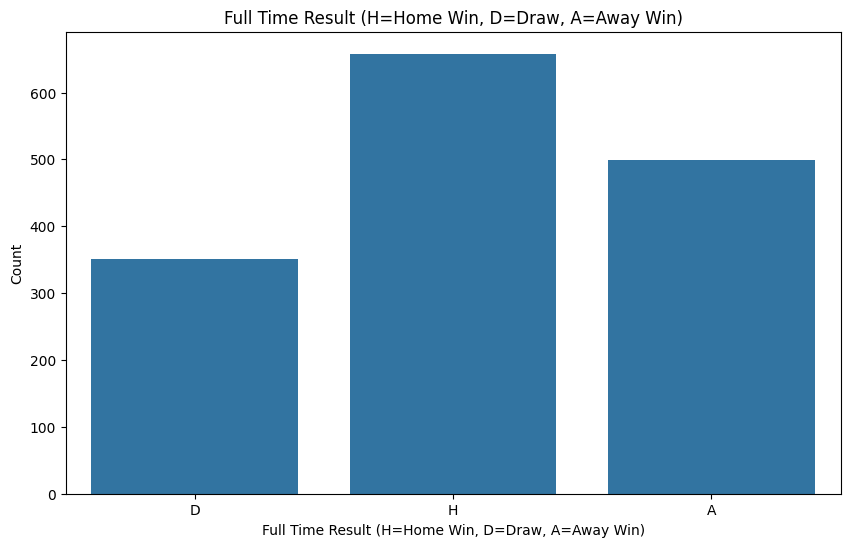

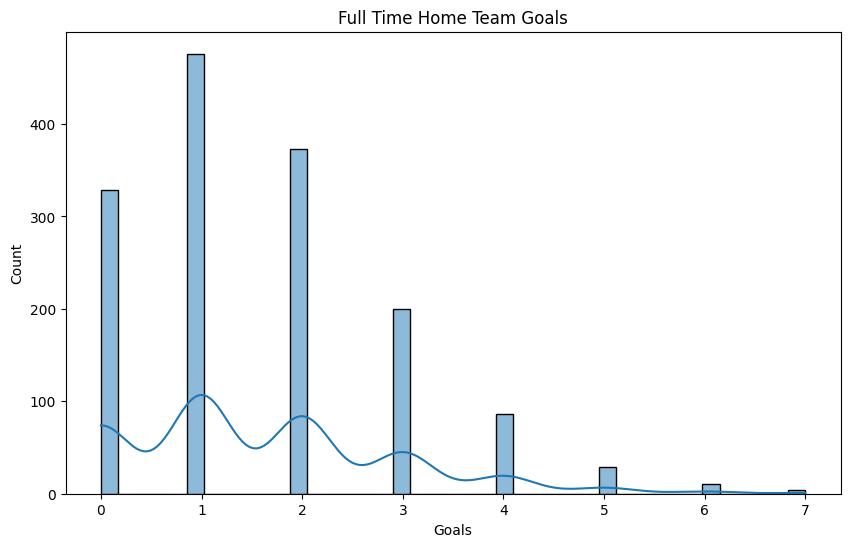

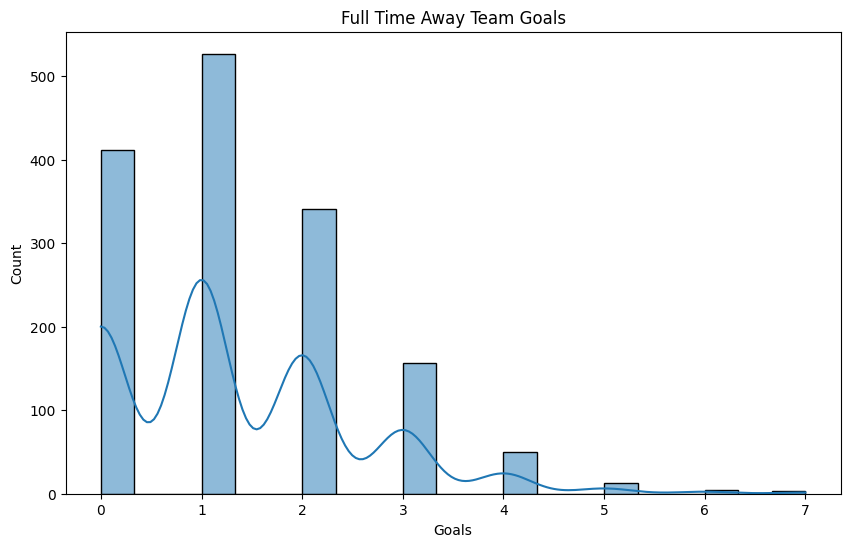

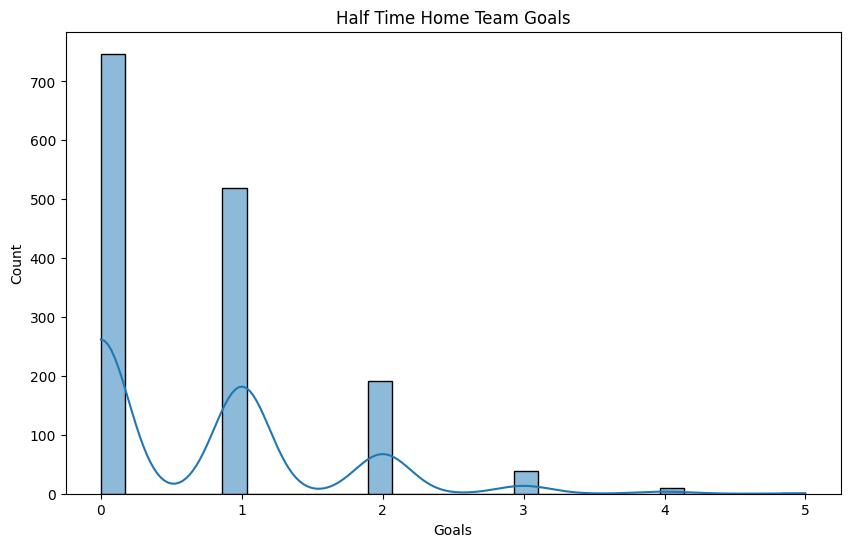

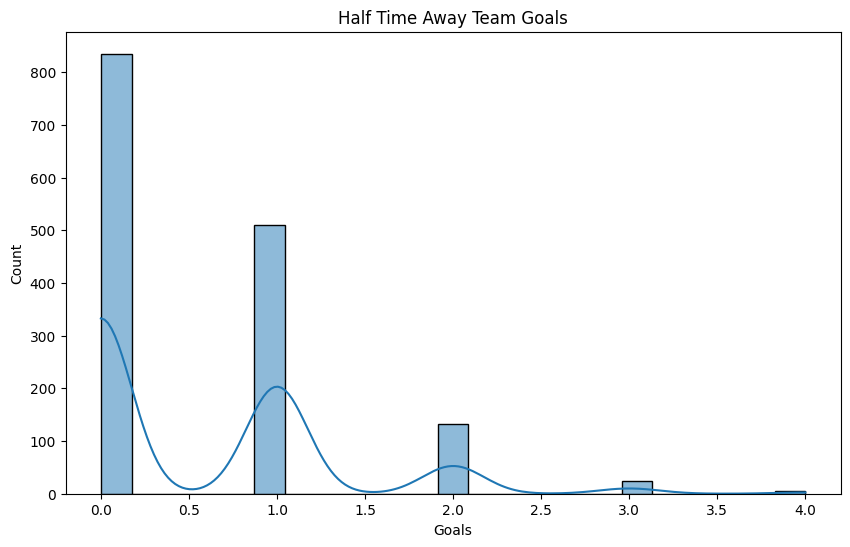

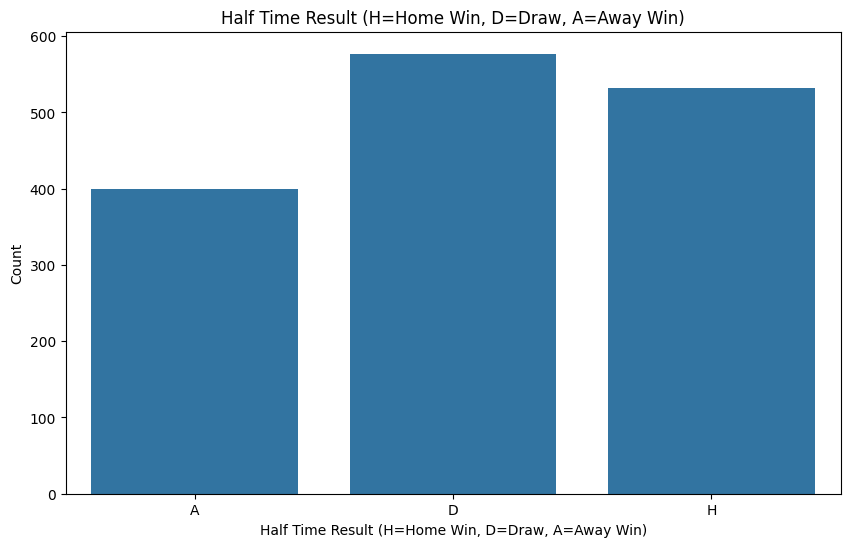

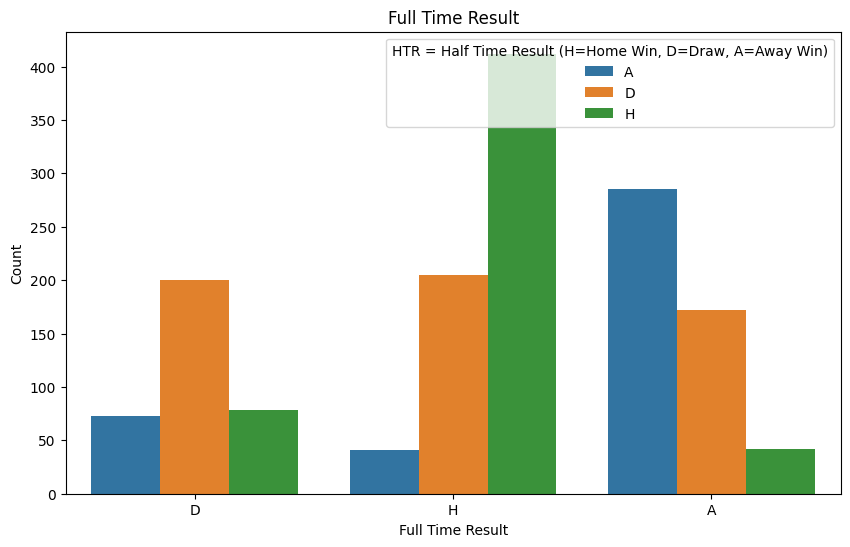

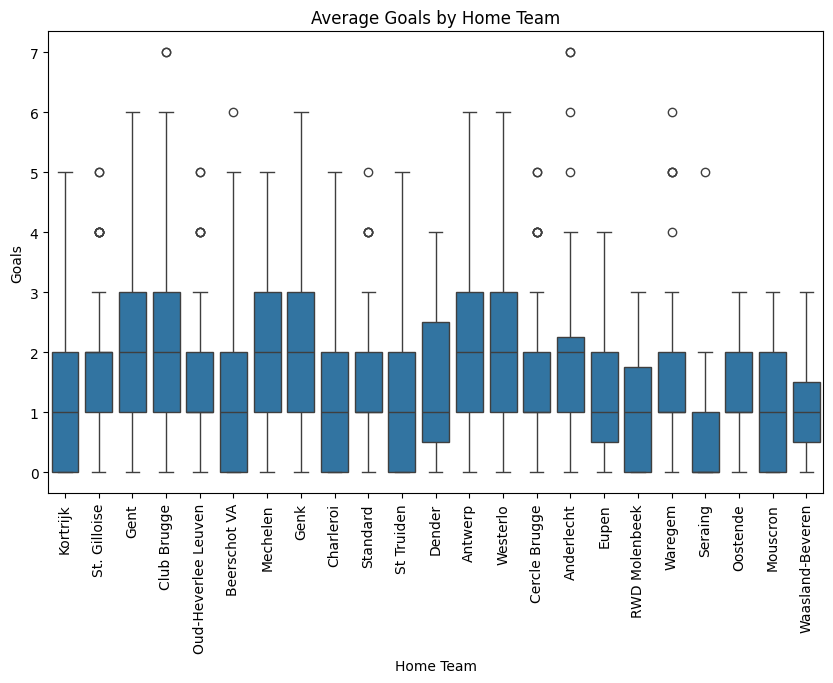

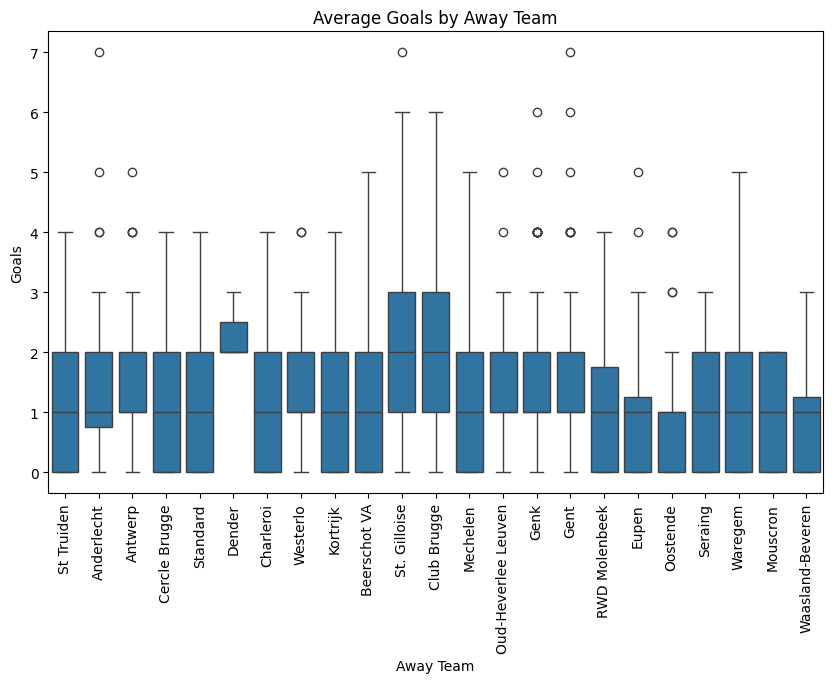

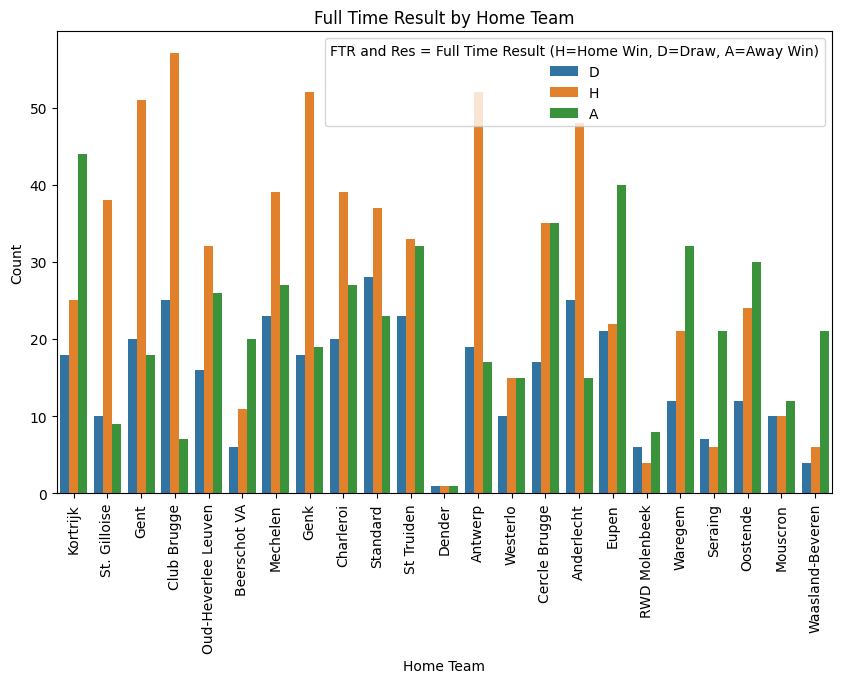

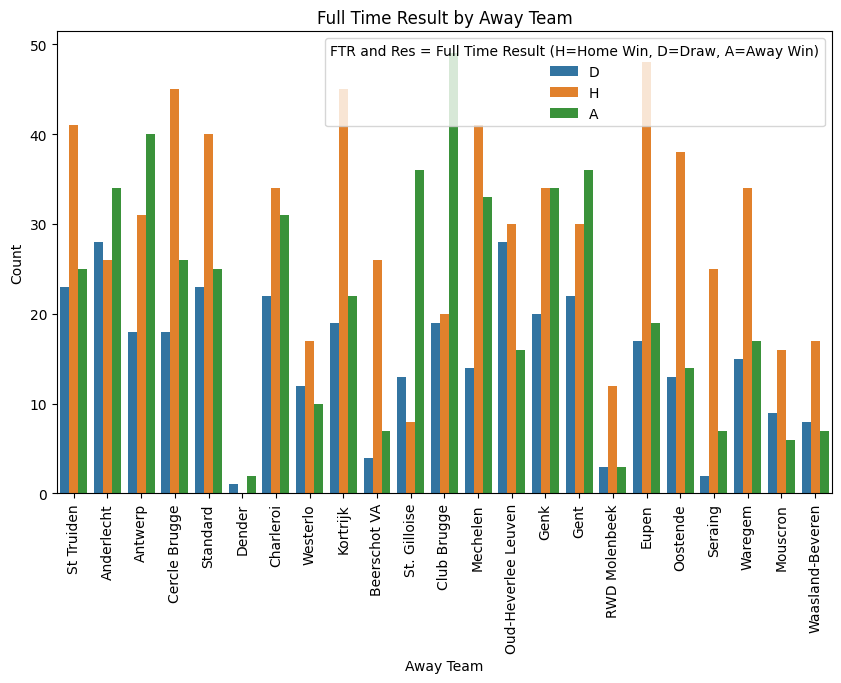

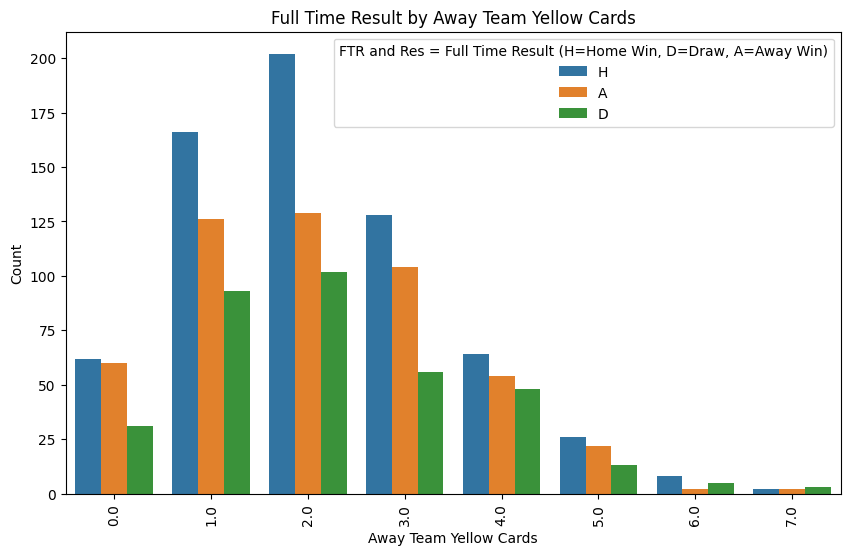

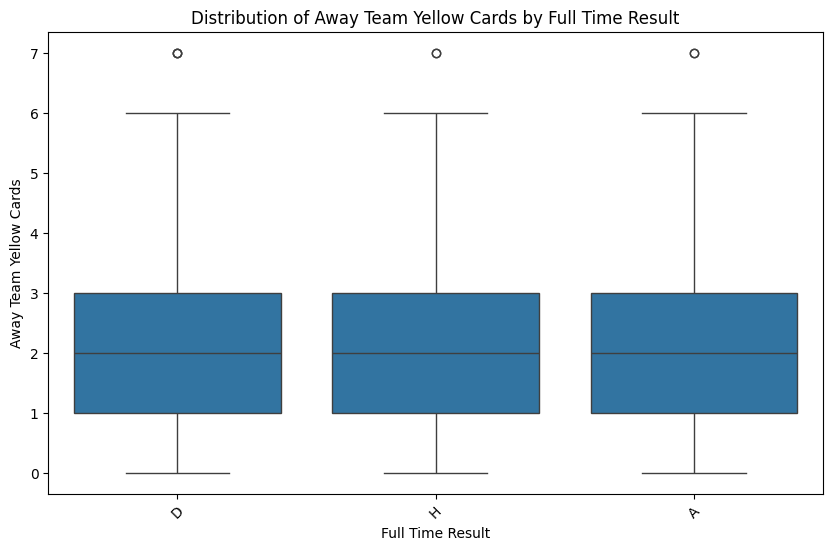

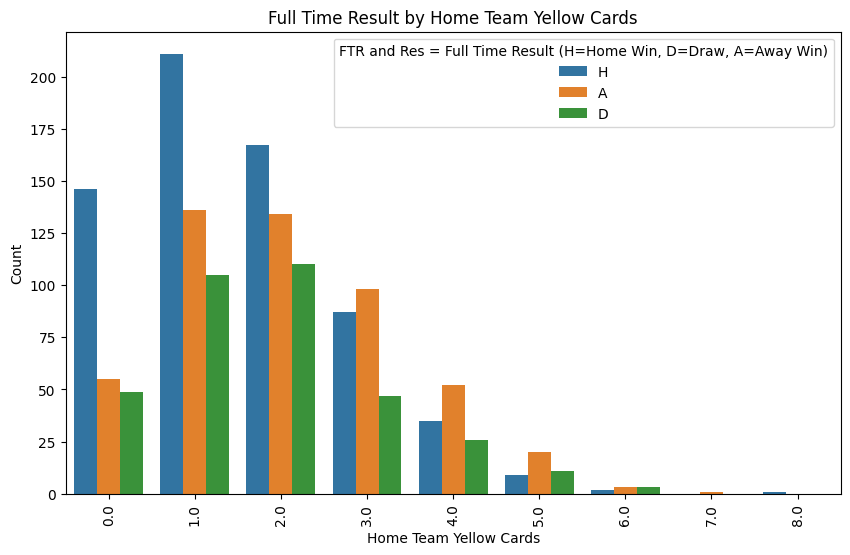

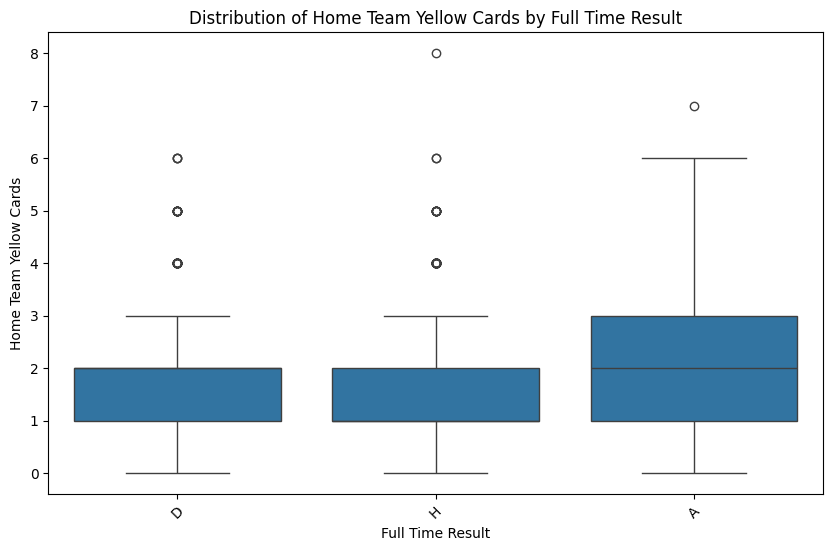

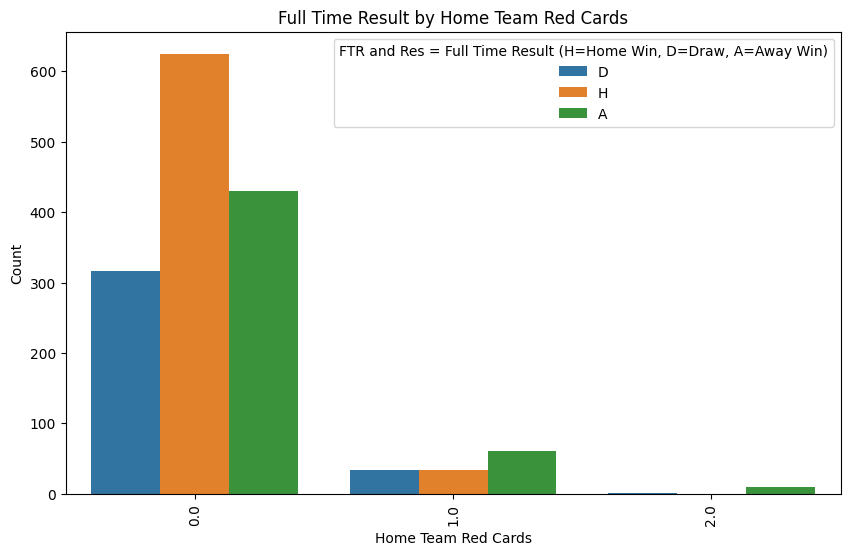

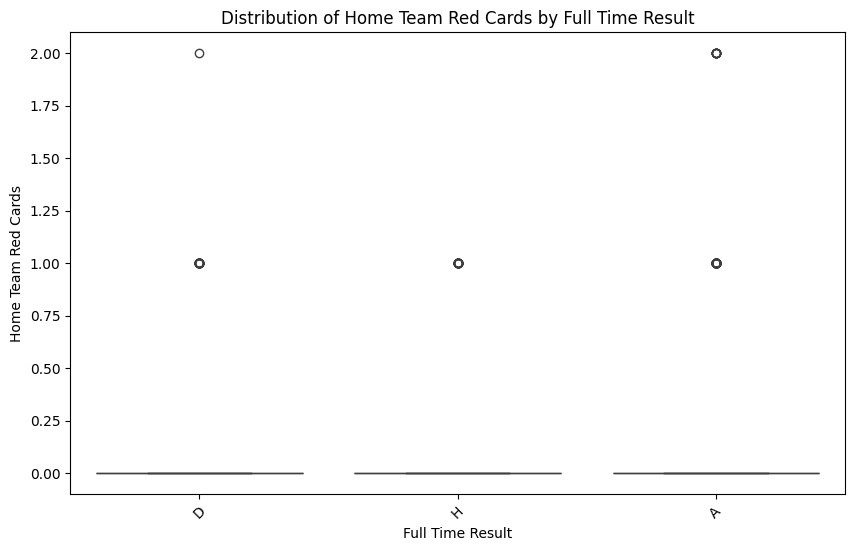

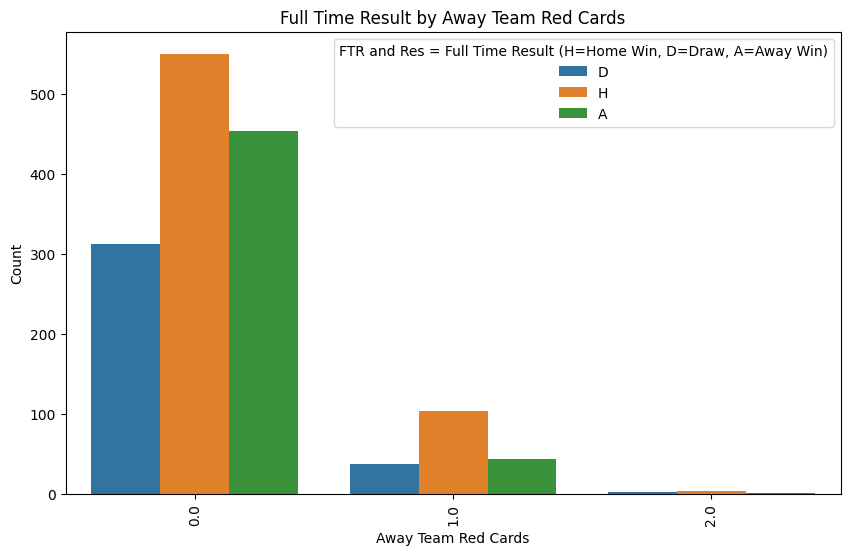

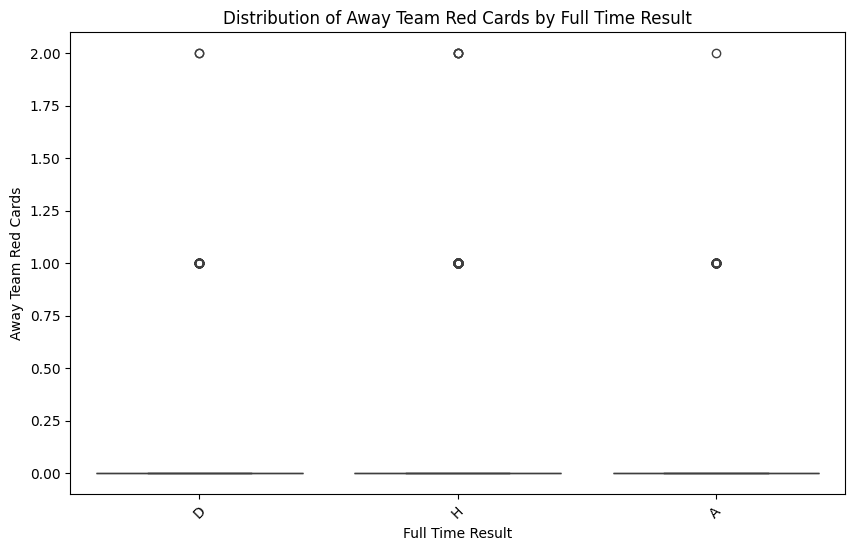

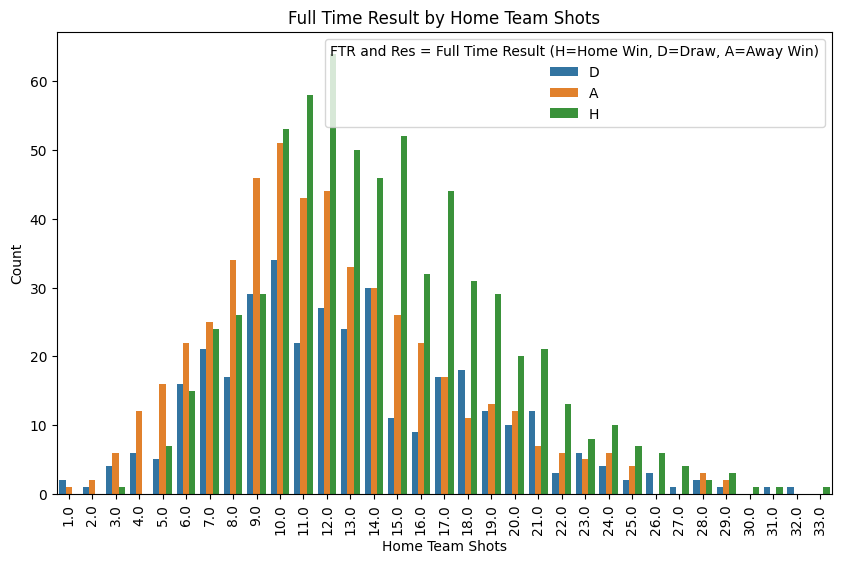

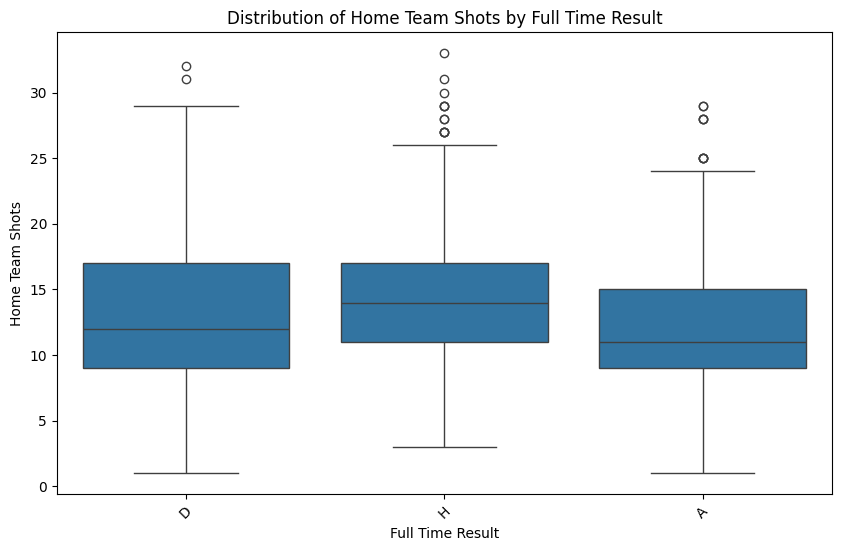

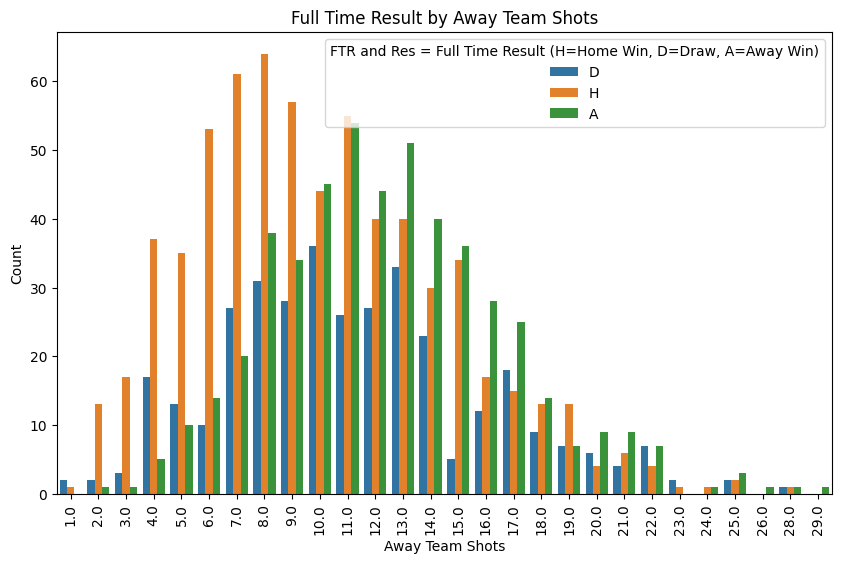

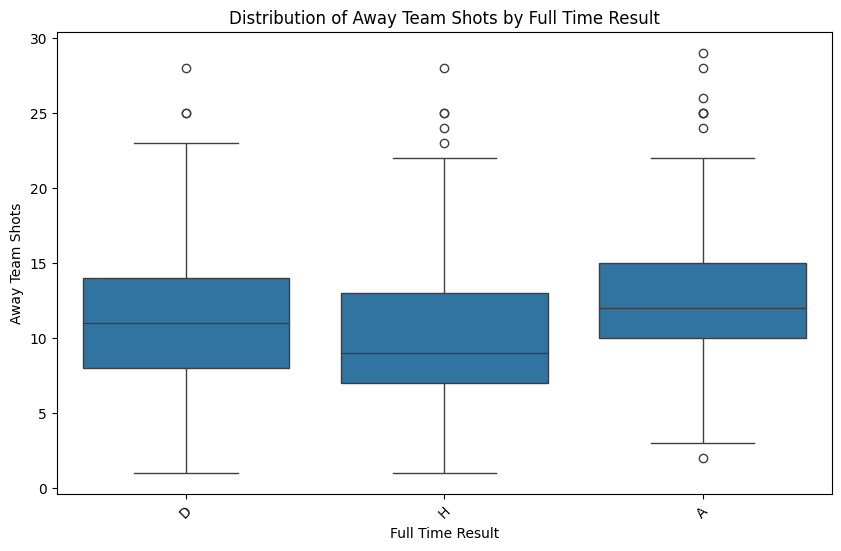

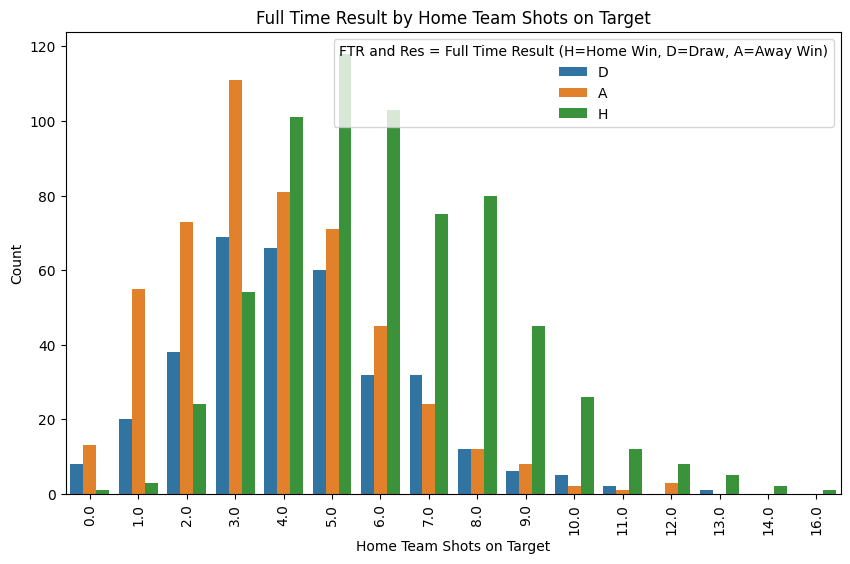

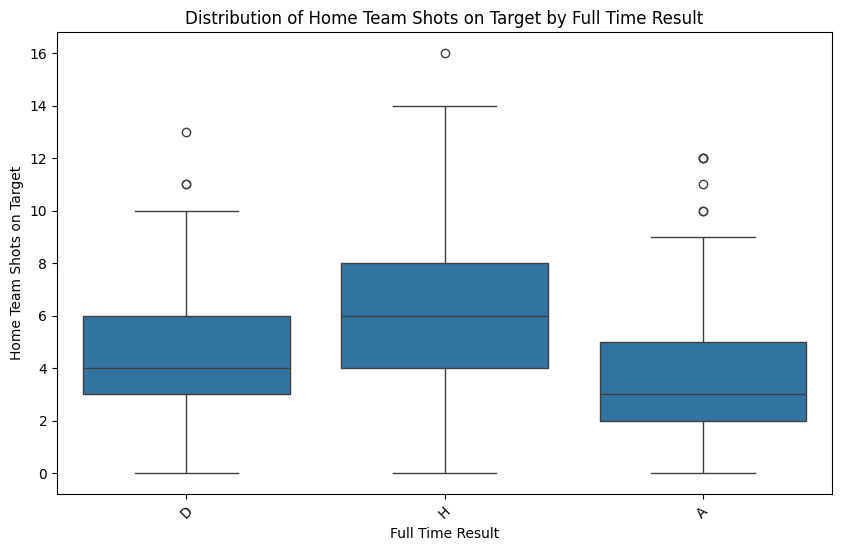

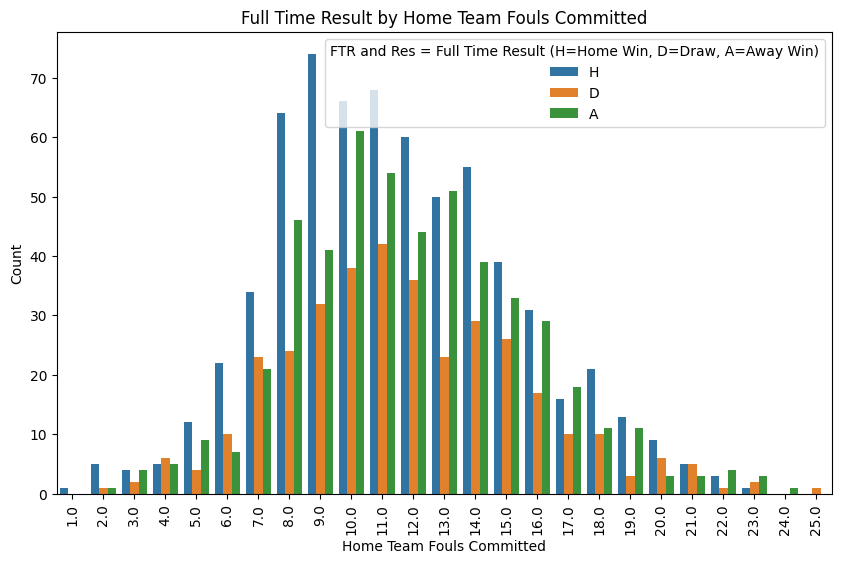

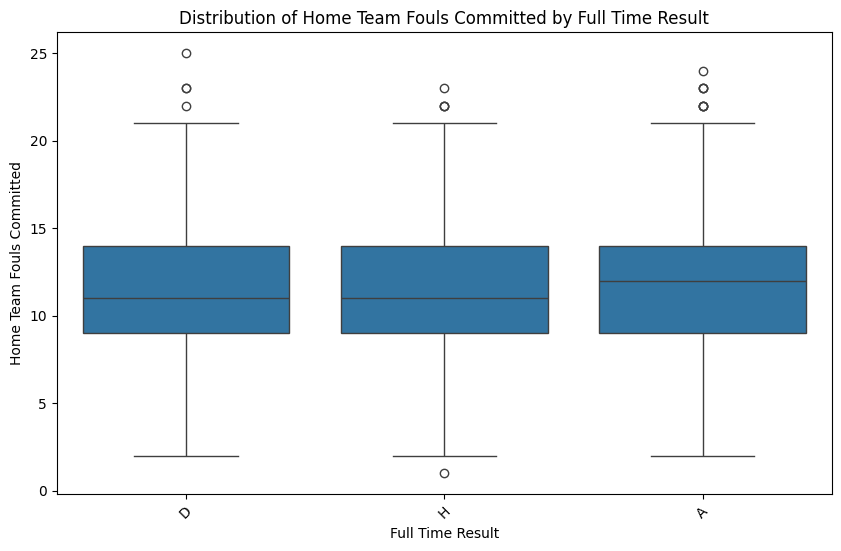

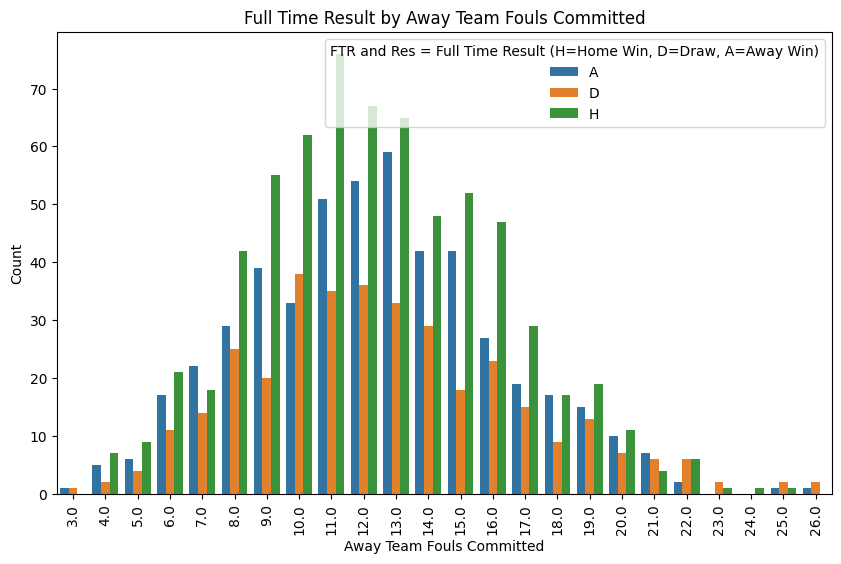

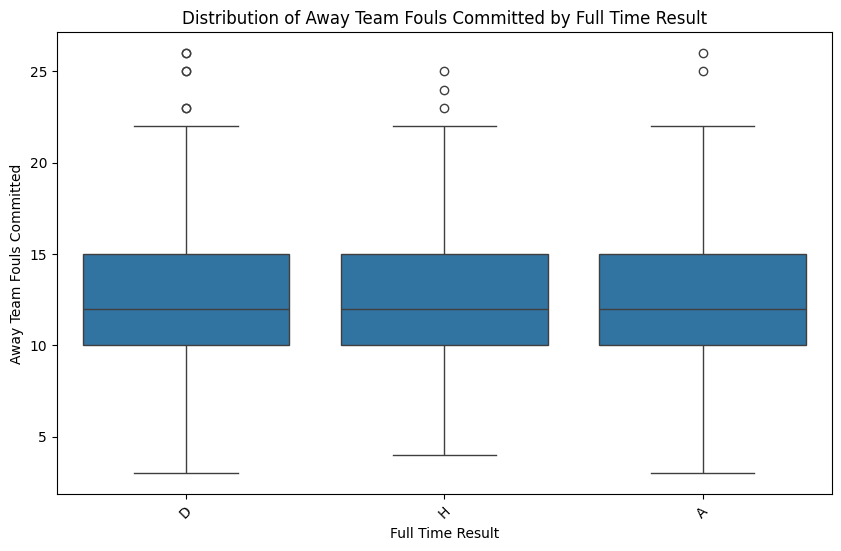

In [10]:
# Data vizualization

# Plot FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

plt.figure(figsize=(10, 6))
sns.countplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', data=df_clean)  # This counts occurrences of each result
plt.title('Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.xlabel('Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.ylabel('Count')
plt.show()

# Plot FTHG and HG = Full Time Home Team Goals

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['FTHG and HG = Full Time Home Team Goals'], kde=True)
plt.title('Full Time Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()

# Plot FTAG and AG = Full Time Away Team Goals
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['FTAG and AG = Full Time Away Team Goals'], kde=True)
plt.title('Full Time Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()

# Plot HTHG = Half Time Home Team Goals

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['HTHG = Half Time Home Team Goals'], kde=True)
plt.title('Half Time Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()

# Plot HTAG = Half Time Away Team Goals

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['HTAG = Half Time Away Team Goals'], kde=True)
plt.title('Half Time Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.show()

# Plot HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

plt.figure(figsize=(10, 6))
sns.countplot(x='HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)', data=df_clean)
plt.title('Half Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.xlabel('Half Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.ylabel('Count')
plt.show()


# Plot average wins and losses by home team and away team

plt.figure(figsize=(10, 6))
sns.countplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', data=df_clean, hue='HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()


# Plot average goals by HomeTeam

plt.figure(figsize=(10, 6))
sns.boxplot(x='HomeTeam', y='FTHG and HG = Full Time Home Team Goals', data=df_clean)
plt.title('Average Goals by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.show()

# Plot average goals by AwayTeam

plt.figure(figsize=(10, 6))
sns.boxplot(x='AwayTeam', y='FTAG and AG = Full Time Away Team Goals', data=df_clean)   
plt.title('Average Goals by Away Team')
plt.xlabel('Away Team')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.show()

# Plot FTR by HomeTeam

plt.figure(figsize=(10, 6))
sns.countplot(x='HomeTeam', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot FTR by AwayTeam

plt.figure(figsize=(10, 6))
sns.countplot(x='AwayTeam', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Away Team')
plt.xlabel('Away Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



# Plot FTR by AY

plt.figure(figsize=(10, 6))
sns.countplot(x='AY = Away Team Yellow Cards', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Away Team Yellow Cards')
plt.xlabel('Away Team Yellow Cards')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='AY = Away Team Yellow Cards', data=df_clean)
plt.title('Distribution of Away Team Yellow Cards by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Team Yellow Cards')
plt.xticks(rotation=45)
plt.show()


# Plot FTR by HY

plt.figure(figsize=(10, 6))
sns.countplot(x='HY = Home Team Yellow Cards', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team Yellow Cards')
plt.xlabel('Home Team Yellow Cards')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='HY = Home Team Yellow Cards', data=df_clean)
plt.title('Distribution of Home Team Yellow Cards by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Yellow Cards')
plt.xticks(rotation=45)
plt.show()


# Plot FTR by HR

plt.figure(figsize=(10, 6))
sns.countplot(x='HR = Home Team Red Cards', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team Red Cards')
plt.xlabel('Home Team Red Cards')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='HR = Home Team Red Cards', data=df_clean)
plt.title('Distribution of Home Team Red Cards by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Red Cards')
plt.xticks(rotation=45)
plt.show()


# Plot FTR by AR

plt.figure(figsize=(10, 6))
sns.countplot(x='AR = Away Team Red Cards', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Away Team Red Cards')
plt.xlabel('Away Team Red Cards')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='AR = Away Team Red Cards', data=df_clean)
plt.title('Distribution of Away Team Red Cards by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Team Red Cards')
plt.xticks(rotation=45)
plt.show()



# Plot FTR by HS

plt.figure(figsize=(10, 6))
sns.countplot(x='HS = Home Team Shots', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team Shots')
plt.xlabel('Home Team Shots')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='HS = Home Team Shots', data=df_clean)
plt.title('Distribution of Home Team Shots by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Shots')
plt.xticks(rotation=45)
plt.show()


# Plot FTR by AS

plt.figure(figsize=(10, 6))
sns.countplot(x='AS = Away Team Shots', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Away Team Shots')
plt.xlabel('Away Team Shots')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='AS = Away Team Shots', data=df_clean)
plt.title('Distribution of Away Team Shots by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Team Shots')
plt.xticks(rotation=45)
plt.show()




# Plot FTR by HST

plt.figure(figsize=(10, 6))
sns.countplot(x='HST = Home Team Shots on Target', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team Shots on Target')
plt.xlabel('Home Team Shots on Target')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='HST = Home Team Shots on Target', data=df_clean)
plt.title('Distribution of Home Team Shots on Target by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Shots on Target')
plt.xticks(rotation=45)
plt.show()



# Plot FTR by HF

plt.figure(figsize=(10, 6))
sns.countplot(x='HF = Home Team Fouls Committed', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Home Team Fouls Committed')
plt.xlabel('Home Team Fouls Committed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='HF = Home Team Fouls Committed', data=df_clean)
plt.title('Distribution of Home Team Fouls Committed by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Fouls Committed')
plt.xticks(rotation=45)
plt.show()


# Plot FTR by AF

plt.figure(figsize=(10, 6))
sns.countplot(x='AF = Away Team Fouls Committed', data=df_clean, hue='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')
plt.title('Full Time Result by Away Team Fouls Committed')
plt.xlabel('Away Team Fouls Committed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)', y='AF = Away Team Fouls Committed', data=df_clean)
plt.title('Distribution of Away Team Fouls Committed by Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Team Fouls Committed')
plt.xticks(rotation=45)
plt.show()




In [11]:
# Transform categorical data into numerical data

from sklearn.preprocessing import LabelEncoder

def encode_data(df):
    le = LabelEncoder()
    df['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'] = le.fit_transform(df['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'])
    df['HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)'] = le.fit_transform(df['HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)']) 
    df['Date'] = le.fit_transform(df['Date'])
    df['Time'] = le.fit_transform(df['Time'])

    df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
    df['AwayTeam'] = le.fit_transform(df['AwayTeam'])
    return df

df_encoded = encode_data(df_clean.copy())
df_encoded.head()


,Date,Time,HomeTeam,AwayTeam,FTHG and HG = Full Time Home Team Goals,FTAG and AG = Full Time Away Team Goals,"FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)",HTHG = Half Time Home Team Goals,HTAG = Half Time Away Team Goals,"HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)",...,Avg>2.5 = Market average over 2.5 goals,AHh = Market size of handicap (home team) (since 2019/2020),B365AHH = Bet365 Asian handicap home team odds,B365AHA = Bet365 Asian handicap away team odds,PAHH = Pinnacle Asian handicap home team odds,PAHA = Pinnacle Asian handicap away team odds,MaxAHH = Market maximum Asian handicap home team odds,MaxAHA = Market maximum Asian handicap away team odds\t,AvgAHH = Market average Asian handicap home team odds,AvgAHA = Market average Asian handicap away team odds
0,565,13,10,17,1.0,1.0,1,0.0,1.0,0,...,1.94,-0.25,1.83,2.03,1.83,2.01,1.87,2.06,1.82,2.00
1,565,10,18,0,0.0,0.0,1,0.0,0.0,1,...,2.07,-0.50,2.05,1.75,2.07,1.78,2.10,1.85,2.05,1.78
2,565,4,9,1,1.0,1.0,1,1.0,1.0,1,...,2.13,0.00,1.88,1.98,1.85,1.98,1.92,2.02,1.87,1.97
3,565,0,5,3,3.0,0.0,2,2.0,0.0,2,...,2.50,-1.00,1.85,2.00,1.85,1.99,1.90,2.04,1.84,1.97
4,564,16,14,19,2.0,0.0,2,1.0,0.0,2,...,1.84,-0.50,1.95,1.90,1.95,1.90,1.98,1.97,1.93,1.88


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


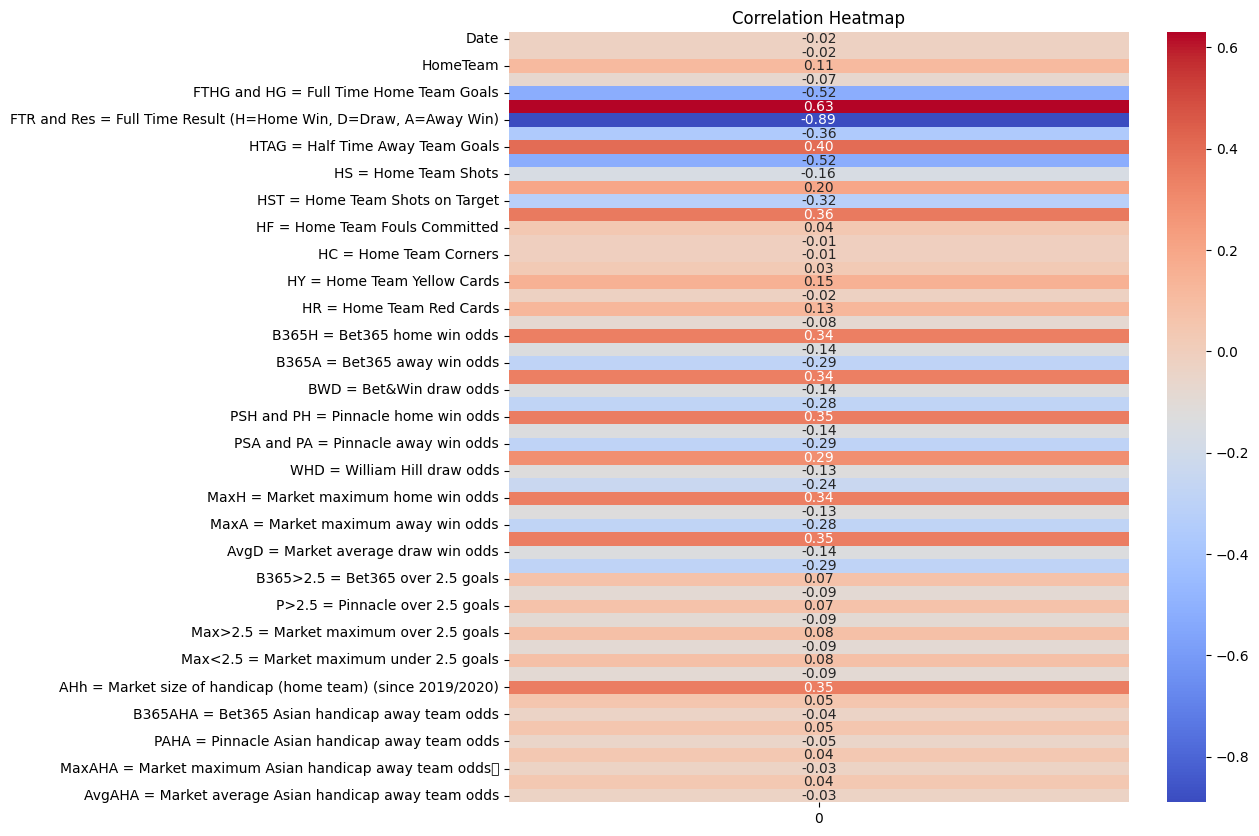

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


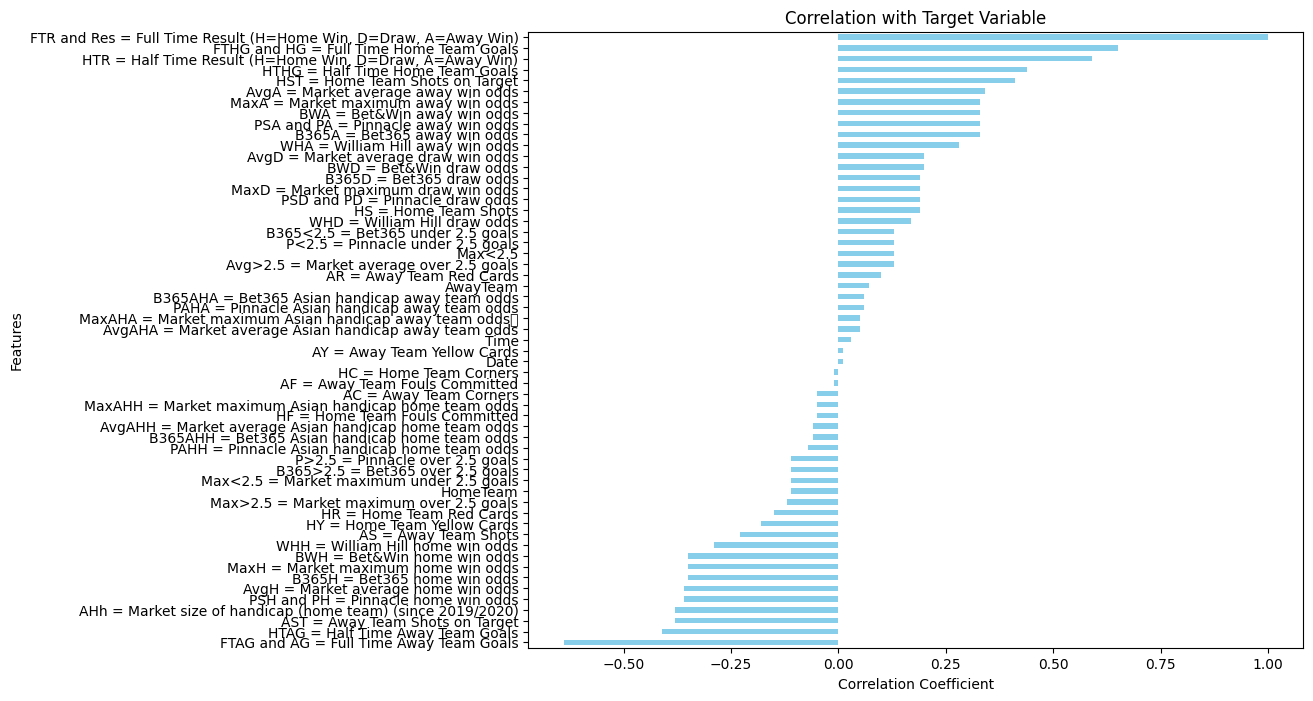

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
correlations = df_encoded.corrwith(df_encoded['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)'] == 0).round(2)

# Plot heatmap
plt.figure(figsize=(10, 10))  # Reduced size to 10x10 for better fit
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')

# Title and display
plt.title('Correlation Heatmap')
plt.show()


import matplotlib.pyplot as plt

# Calculate correlations
correlations = df_encoded.corrwith(df_encoded['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)']).round(2)

# Plot bar plot
plt.figure(figsize=(10, 8))
correlations.dropna().sort_values().plot(kind='barh', color='skyblue')  # Drop NaNs and sort values
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [13]:
# Choose the features that have a correlation coefficient greater than 0.1
features = correlations[correlations > 0.1].index.tolist()
features.remove('FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)')  # Remove target variable
features


['FTHG and HG = Full Time Home Team Goals',
 'HTHG = Half Time Home Team Goals',
 'HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)',
 'HS = Home Team Shots',
 'HST = Home Team Shots on Target',
 'B365D = Bet365 draw odds',
 'B365A = Bet365 away win odds',
 'BWD = Bet&Win draw odds',
 'BWA = Bet&Win away win odds',
 'PSD and PD = Pinnacle draw odds',
 'PSA and PA = Pinnacle away win odds',
 'WHD = William Hill draw odds',
 'WHA = William Hill away win odds',
 'MaxD = Market maximum draw win odds',
 'MaxA = Market maximum away win odds',
 'AvgD = Market average draw win odds',
 'AvgA = Market average away win odds',
 'B365<2.5 = Bet365 under 2.5 goals',
 'P<2.5 = Pinnacle under 2.5 goals',
 'Max<2.5',
 'Avg>2.5 = Market average over 2.5 goals']

In [14]:


# Split the data into features and target variable


X = df_encoded[features]
y = df_encoded['FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)']

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'XGBoost': XGBClassifier(),Random Forest: 0.65
Gradient Boosting: 0.69
SVM: 0.65
Logistic Regression: 0.66
K-Nearest Neighbors: 0.62


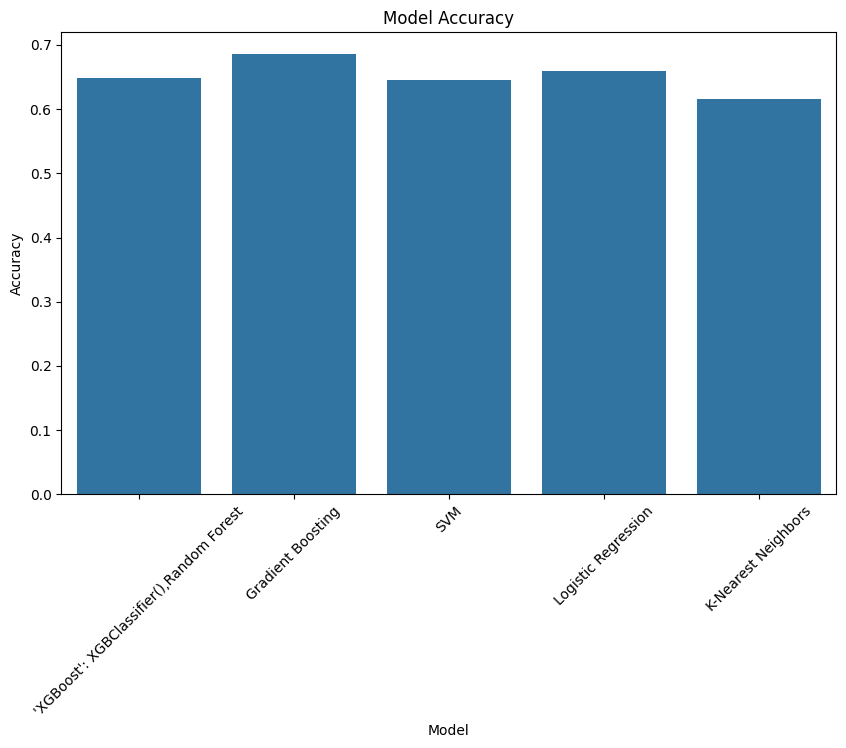

In [15]:
# Try other models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
'''from xgboost import XGBClassifier'''


# Create the models

models = {
    ''''XGBoost': XGBClassifier(),'''
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Print the accuracy of each model

for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy:.2f}')


# Plot the accuracy of each model

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Save the best model